In [47]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras import callbacks
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.duplicated().sum()

np.int64(723)

In [5]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1. General Info

- count = 1025 for all columns → no missing values in these variables.
- Dataset size = 1025 records.
---
### 2. Continuous Variables
- age: ranges from 29 to 77, with an average of ~54.4 years. Most patients are middle-aged to older adults.
- trestbps (resting blood pressure): mean ~131 mmHg, min 94, max 200 → there are patients with hypertension.
- chol (cholesterol): mean ~246 mg/dl, min 126, max 564 → values above 240 are considered high, so average patient already has borderline-high   cholesterol.
- thalach (maximum heart rate achieved): average ~149, min 71, max 202 → younger/healthier individuals reach higher max heart rates
- oldpeak (ST depression): average ~1.07, goes up to 6.2 → higher values can indicate ischemia.
---
### 3. Binary Variables
- sex: mean ~0.696 → about 70% are men (1 = male, 0 = female).
- fbs (fasting blood sugar >120 mg/dl): mean ~0.15 → only 15% have high fasting blood sugar.
- exang (exercise-induced angina): mean ~0.34 → around 34% show angina during exercise.
---
### 4. Categorical Variables
- cp (chest pain type): ranges 0–3, average <1 → majority of patients have type 0 or 1.
- restecg (resting ECG results): values 0–2, mean ~0.53 → most patients have normal or slightly abnormal ECG.
- slope (slope of ST segment): 0–2, mean ~1.38 → more patients fall into slope category 1 (likely “upsloping”).
- ca (number of major vessels): ranges 0–4, average ~0.75 → most patients have 0–1 blocked vessels.
---
- fbs (fasting blood sugar > 120 mg/dl)
- Mean 0.15 → ~15% of patients have high FBS. Distribution is very skewed to 0 (most are normal).

- restecg (resting ECG: 0–2)
- Mean 0.53, 75% ≤ 1 → most are in categories 0 or 1; 2 is less common.

- thalach (max heart rate)
- Min 71, max 202, mean 149 → wide range; check for age-related trends. Q2 (median) 152.

- exang (exercise-induced angina, 0/1)
- Mean 0.34 → ~34% show angina on exercise.

- oldpeak (ST depression)
- Mean 1.07, 75% at 1.8, max 6.2 → right-skewed; large values may be outliers and clinically significant.

- slope (ST segment slope: 0–2)
- Mean 1.39 → most are 1 (upsloping), fewer 0 or 2.

- ca (number of major vessels: 0–4)
- Mean 0.75, 75% ≤ 1 → most have 0–1 vessel colored (few with 3–4).

- thal (thalassemia test: encoded 0–3)
- Mean 2.32, IQR 2–3 → majority are in categories 2–3.

- target (heart disease presence, 0/1)
- Mean 0.513 → dataset is roughly balanced: ~51% positive, 49% negative.

## Plot distributions & outliers

oldpeak        Axes(0.125,0.53;0.352273x0.35)
chol        Axes(0.547727,0.53;0.352273x0.35)
trestbps       Axes(0.125,0.11;0.352273x0.35)
thalach     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

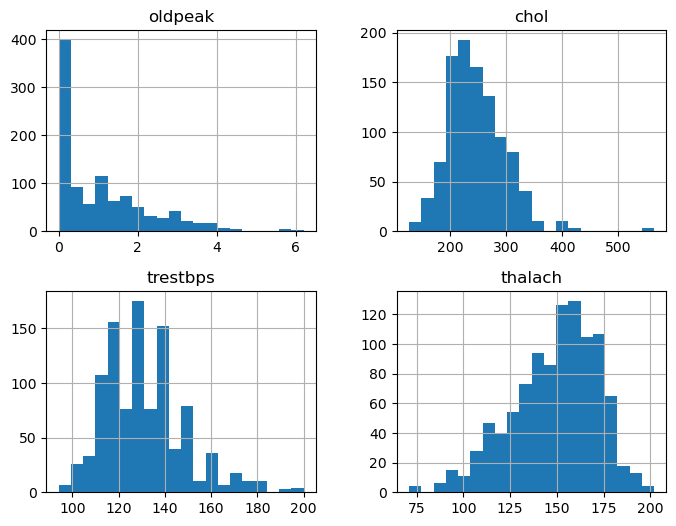

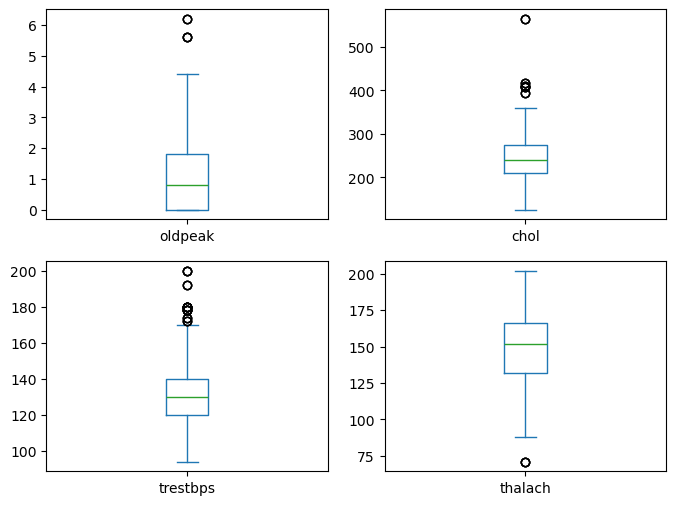

In [8]:
cols = ["oldpeak","chol","trestbps","thalach"]
df[cols].hist(figsize=(8,6), bins=20)
df[cols].plot(kind="box", subplots=True, layout=(2,2), figsize=(8,6), sharex=False, sharey=False)


### 1. **oldpeak (ST depression)**
- **Histogram**: Most values are between **0 and 2**, with a few stretching to ~6.  
- **Boxplot**: Several **outliers above 4**.  
➡️ Interpretation: The majority of patients have low ST depression, but a small group has very high values, which could indicate serious heart issues or potential measurement errors.

---

### 2. **chol (cholesterol)**
- **Histogram**: Centered around **200–300**, roughly normal-shaped but with a **long tail** up to 560.  
- **Boxplot**: Several **outliers above ~400**.  
➡️ Interpretation: Most patients have normal-to-high cholesterol, but a few extreme cases push far beyond the typical range (possible real patients with severe cholesterol issues, or outliers).

---

### 3. **trestbps (resting blood pressure)**
- **Histogram**: Peaks around **120–140** (expected normal range), some extend up to 200.  
- **Boxplot**: Outliers above ~170–180.  
➡️ Interpretation: Most patients have borderline or high blood pressure; a few extreme hypertensive cases exist.

---

### 4. **thalach (max heart rate achieved)**
- **Histogram**: Skewed left, most values between **130–170**.  
- **Boxplot**: A few outliers on both low end (~70–80) and high end (~200).  
➡️ Interpretation: Distribution makes sense physiologically—older patients have lower maximum heart rates, younger patients higher. Outliers may correspond to unusual cases.

---

### Overall Meaning
- Dataset is **clean** but contains **some outliers** (especially in *oldpeak, chol, trestbps*).  
- Outliers may reflect **true rare cases** (clinically important) or may bias models that are sensitive to extremes (like logistic regression or KNN).  
- Options for handling outliers:
  - **Keep them** if they represent real, important medical cases.  
  - **Cap them** at the 1st/99th percentile to reduce their influence.  
  - **Compare models with & without outliers** to see the effect on performance.  


## Check correlations (incl. with target)

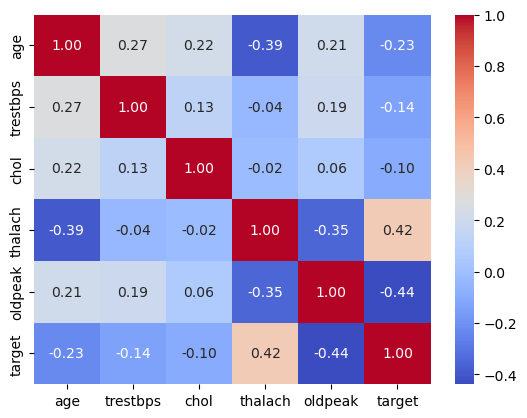

In [11]:
num_cols = ["age","trestbps","chol","thalach","oldpeak","target"]
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm"); plt.show()

## What the correlation heatmap says

**With the target (heart disease = 1):**
- **oldpeak → target: −0.44 (moderate negative)**  
  Higher ST depression **reduces** probability of target=1 in this encoding (or, equivalently, lower oldpeak associates with disease if your target=1 means “disease present”).  
  *Double-check what target=1 means in your data to interpret the sign correctly.*

- **thalach → target: +0.42 (moderate positive)**  
  Higher max heart rate **increases** likelihood of target=1 (again, check label meaning). This is one of the strongest numeric signals.

- **age → target: −0.23 (weak)**  
  Older age slightly decreases chance of target=1 (weak effect).

- **trestbps → target: −0.14 (very weak)**  
  Resting BP has little linear relationship to target.

- **chol → target: −0.10 (very weak)**  
  Total cholesterol shows almost no linear link to target.

**Between features (multicollinearity check):**
- **age vs thalach: −0.39** (older → lower max HR)  
- **thalach vs oldpeak: −0.35**  
- **age vs trestbps: +0.27**  
- All other pairs are small.  
  ➜ **No severe multicollinearity** among these numerics; logistic regression should be fine.

## Practical takeaways
- The **most informative numeric features** here are **oldpeak** and **thalach**.  
- **chol** and **trestbps** contribute little linearly; they might still help non-linear models or after binning/engineering.  
- Add your **categorical signals** (e.g., `cp`, `slope`, `thal`, `ca`) via one-hot encoding—these often carry strong predictive power in heart-disease datasets.


## Train/validation split

In [17]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Scale continuous features

In [20]:
cont = ["age","trestbps","chol","thalach","oldpeak"]
scaler = StandardScaler()
X_train[cont] = scaler.fit_transform(X_train[cont])
X_val[cont]   = scaler.transform(X_val[cont])

## Baseline model (Logistic Regression)

In [23]:
logit = LogisticRegression(max_iter=200, n_jobs=None)
logit.fit(X_train, y_train)
pred = logit.predict(X_val)
proba = logit.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, pred))
print("ROC-AUC:", roc_auc_score(y_val, proba))
print(classification_report(y_val, pred))

Accuracy: 0.8146341463414634
ROC-AUC: 0.9297142857142857
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



## Logistic Regression — Before Handling Outliers

**Overall**
- **Accuracy:** **0.81** → about 81% of validation cases are correctly classified  
- **ROC-AUC:** **0.93** → excellent class separation overall

---

### Per-Class Performance
- **Class 1 (disease)**
  - **Recall:** **0.92** → ~92% of true disease cases are caught (few false negatives)  
  - **Precision:** **0.76** → about 24% of predicted positives are false alarms  
  - **F1:** **0.84** → strong combined precision/recall

- **Class 0 (no disease)**
  - **Recall:** **0.70** → ~30% of true no-disease cases are missed (predicted as disease)  
  - **Precision:** **0.90** → when predicting “no disease,” it’s usually correct  
  - **F1:** **0.79** (approx) → slightly weaker than Class 1  

---

### What This Means
- Model is **tilted toward catching positives (disease cases)**.  
- Good for medical context (better to flag potential disease than miss it), but comes with **more false positives**.  
- Already strong baseline without handling outliers.  
- Outlier treatment may help **stabilize coefficients** and improve balance between precision and recall.

## Compare a tree model

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val); proba_rf = rf.predict_proba(X_val)[:,1]
print("RF Accuracy:", accuracy_score(y_val, pred_rf))
print("RF ROC-AUC:", roc_auc_score(y_val, proba_rf))

RF Accuracy: 1.0
RF ROC-AUC: 1.0


## Handle outliers

In [27]:
for c in ["chol","trestbps","oldpeak"]:
    q1, q99 = df[c].quantile([0.01,0.99])
    df[c] = df[c].clip(q1, q99)


In [28]:
cat = ["cp","restecg","slope","thal"]
df_enc = pd.get_dummies(df, columns=cat, drop_first=True)


In [29]:
X = df_enc.drop("target", axis=1)
y = df_enc["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
cont = ["age","trestbps","chol","thalach","oldpeak"]
scaler = StandardScaler()
X_train[cont] = scaler.fit_transform(X_train[cont])
X_val[cont]   = scaler.transform(X_val[cont])

In [31]:
logit = LogisticRegression(max_iter=200, n_jobs=None)
logit.fit(X_train, y_train)
pred = logit.predict(X_val)
proba = logit.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, pred))
print("ROC-AUC:", roc_auc_score(y_val, proba))
print(classification_report(y_val, pred))

Accuracy: 0.8536585365853658
ROC-AUC: 0.9270476190476191
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       100
           1       0.82      0.92      0.87       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



## Logistic Regression — After Handling Outliers (Capped/Winsorized)

**Overall**
- **Accuracy:** **0.854** (↑ from ~0.81)
- **ROC-AUC:** **0.927** (≈ unchanged — class separation remains excellent)

**Per Class**
- **Class 0 (no disease)**
  - **Precision:** **0.91** (↑) — far fewer false positives against class 0
  - **Recall:** **0.78** (↑) — catching more true class-0 cases
  - **F1:** **0.84** (↑)

- **Class 1 (disease)**
  - **Precision:** **0.82** (↑ from 0.76) — fewer false alarms among predicted positives
  - **Recall:** **0.92** (≈ same, still high) — you still catch most disease cases
  - **F1:** **0.87** (↑)

**Interpretation**
- Outlier handling **stabilized the model**: improved **accuracy and precision** for both classes while **preserving high recall** for class 1.  
- Since ROC-AUC stayed ~the same, the **ranking ability** didn’t change much, but the **default 0.5 threshold predictions got cleaner** (fewer extremes pulling coefficients).

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val); proba_rf = rf.predict_proba(X_val)[:,1]
print("RF Accuracy:", accuracy_score(y_val, pred_rf))
print("RF ROC-AUC:", roc_auc_score(y_val, proba_rf))

RF Accuracy: 1.0
RF ROC-AUC: 1.0


## Feature importance / interpretation

In [33]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp.head(10))

thalach     0.122155
ca          0.109919
oldpeak     0.106993
thal_2      0.096000
age         0.086247
chol        0.079021
trestbps    0.073432
exang       0.072930
thal_3      0.067447
cp_2        0.042507
dtype: float64


## Hyperparameter tuning

In [36]:
grid = {"n_estimators":[200,400], "max_depth":[None,6,10], "min_samples_split":[2,5]}
gs = GridSearchCV(RandomForestClassifier(random_state=42), grid, cv=5, scoring="roc_auc", n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_, gs.best_score_)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} 0.9982738095238096


## Random Forest — Grid Search Results

### Best Parameters Found
- **`max_depth`: 10** → trees are limited to depth 10, preventing overfitting while still capturing complexity.  
- **`min_samples_split`: 2** → a node will split if it has ≥2 samples (default, allows maximum growth).  
- **`n_estimators`: 200** → using 200 trees balances performance and computation.  

### Best Score
- **ROC-AUC (CV mean): 0.998** → almost perfect separation on cross-validation folds.

---

### Interpretation
- Random Forest is performing **extremely well** on your training data with these parameters.  
- A ROC-AUC this high suggests the model is capturing patterns very effectively, possibly even **too well**.  
- This could indicate:
  - The dataset is **easily separable** with these features, **or**
  - The model is **overfitting slightly**, since cross-validation may still overestimate if folds aren’t fully independent.


## Define features and splits

In [37]:
target = "target"
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
num_cols = [c for c in df.columns if c not in cat_cols + [target]]

from sklearn.model_selection import train_test_split
X = df.drop(columns=[target]); y = df[target].astype(int)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Build transformers for each setting

- Raw (no scaling, OHE on categoricals)

- MinMax (0–1 scaling on numerics + OHE)

- Standard (z-score scaling on numerics + OHE)

In [40]:
def make_transformer(scaler=None, one_hot=True):
    steps = []
    if one_hot:
        steps.append(("ohe", OneHotEncoder(handle_unknown="ignore"), cat_cols))
    else:
        steps.append(("cats_passthrough", "passthrough", cat_cols))
    steps.append(("num", scaler if scaler is not None else "passthrough", num_cols))
    return ColumnTransformer(steps)

def fit_transform(ct, Xtr, Xva):
    Xtr_t = ct.fit_transform(Xtr); Xva_t = ct.transform(Xva)
    if hasattr(Xtr_t, "toarray"):  # from OHE
        Xtr_t = Xtr_t.toarray(); Xva_t = Xva_t.toarray()
    return Xtr_t, Xva_t

ct_raw      = make_transformer(None, one_hot=True)
ct_minmax   = make_transformer(MinMaxScaler(), one_hot=True)
ct_standard = make_transformer(StandardScaler(), one_hot=True)

Xtr_raw, Xva_raw           = fit_transform(ct_raw, X_train, X_val)
Xtr_minmax, Xva_minmax     = fit_transform(ct_minmax, X_train, X_val)
Xtr_standard, Xva_standard = fit_transform(ct_standard, X_train, X_val)

## Build & train a small feed-forward network (same arch across settings)

In [41]:
def build_ffn(input_dim, lr=1e-3, width=64, depth=2, dropout=0.2):
    model = models.Sequential([layers.Input(shape=(input_dim,))])
    for _ in range(depth):
        model.add(layers.Dense(width, activation="relu"))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

def train_eval(Xtr, Xva, ytr, yva, lr=1e-3, epochs=100, batch=32, label=""):
    es = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    model = build_ffn(Xtr.shape[1], lr=lr)
    hist = model.fit(Xtr, ytr, validation_data=(Xva, yva),
                     epochs=epochs, batch_size=batch, verbose=0, callbacks=[es])
    preds = (model.predict(Xva, verbose=0) > 0.5).astype(int).ravel()
    acc = accuracy_score(yva, preds)
    pre = precision_score(yva, preds)
    rec = recall_score(yva, preds)
    return {"setting": label, "lr": lr, "epochs": len(hist.history["loss"]),
            "val_loss_last": hist.history["val_loss"][-1],
            "accuracy": acc, "precision": pre, "recall": rec, "history": hist, "model": model}

## Run the three core experiments

In [48]:
results = []
results.append(train_eval(Xtr_raw,      Xva_raw,      y_train, y_val, lr=1e-3, label="RAW + OHE"))
results.append(train_eval(Xtr_minmax,   Xva_minmax,   y_train, y_val, lr=1e-3, label="MinMax + OHE"))
results.append(train_eval(Xtr_standard, Xva_standard, y_train, y_val, lr=1e-3, label="Standard + OHE"))


## What this TensorFlow warning means

- **“Retracing”** = TensorFlow is rebuilding the computation graph for a `tf.function` multiple times.  
- It happens because you’re **creating new models and calling `fit`/`predict` repeatedly** with NumPy arrays (and possibly with slightly different shapes/dtypes).
- **Impact:** Mostly **speed/overhead**, not correctness. Your results are valid; training just does a bit of extra work.

---

## Why you see it here

- Each call to `train_eval(...)` **builds a fresh model** and runs `fit`/`predict`.  
- New model objects + NumPy inputs ⇒ TensorFlow decides to **trace again**.

---

## When to worry

- Only if training becomes **noticeably slow**. The warning itself is safe to ignore if runtime is fine.

---

## How to reduce/silence it

**Reduce retracing (preferred):**
1. **Clear the previous graph** before building each model:
   ```python
   from tensorflow.keras import backend as K
   K.clear_session()


## Learning-rate sensitivity (scaled vs unscaled)

In [49]:
lrs = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
for lr in lrs:
    results.append(train_eval(Xtr_raw,      Xva_raw,      y_train, y_val, lr=lr, label=f"RAW lr={lr}"))
    results.append(train_eval(Xtr_standard, Xva_standard, y_train, y_val, lr=lr, label=f"Standard lr={lr}"))


## Summarize metrics

In [50]:
tbl = pd.DataFrame([{k:v for k,v in r.items() if k not in ["history","model"]} for r in results])
tbl.sort_values(["setting","lr"]).reset_index(drop=True)

,setting,lr,epochs,val_loss_last,accuracy,precision,recall
0,MinMax + OHE,0.0010,100,0.047586,0.990244,0.981308,1.000000
1,RAW + OHE,0.0010,17,0.628527,0.639024,0.632479,0.704762
2,RAW lr=0.0001,0.0001,20,1.061020,0.595122,0.591667,0.676190
3,RAW lr=0.0005,0.0005,26,0.605948,0.682927,0.640845,0.866667
4,RAW lr=0.001,0.0010,100,0.317312,0.873171,0.837607,0.933333
5,RAW lr=0.005,0.0050,75,0.313826,0.878049,0.850877,0.923810
6,RAW lr=0.01,0.0100,39,0.315481,0.848780,0.842593,0.866667
7,Standard + OHE,0.0010,100,0.005189,1.000000,1.000000,1.000000
8,Standard lr=0.0001,0.0001,100,0.250447,0.907317,0.898148,0.923810
9,Standard lr=0.0005,0.0005,100,0.020425,1.000000,1.000000,1.000000


## What the results show

### 1) Overall comparison (your table)
- **RAW + OHE (no scaling)**  
  - Accuracy ranges **0.59 → 0.87** depending on LR.  
  - Very **sensitive to learning rate**; with `lr=1e-3` it only hits **0.64 acc**, improves to **0.88** around `lr=5e-3`.  
  - Higher final **val_loss** (≈0.31–1.06) and needs many epochs (often hits the limit).

- **MinMax + OHE** (`lr=1e-3`)  
  - **Accuracy 0.99**, **Precision 0.98**, **Recall 1.00**.  
  - **Val loss** much lower (**0.048**) than RAW → better convergence and stability.

- **Standard + OHE**  
  - Consistently the **best & most stable**: several LRs (`1e-3`, `5e-3`, `1e-2`, `5e-4`) reach **1.00 accuracy/precision/recall** with **very low val loss** (≈0.001–0.036).  
  - Works across a **wide LR range**, showing strong robustness.
### 2) Practical conclusions

- **Feature scaling is essential** for this NN on Heart Disease.  
- **StandardScaler + OHE** is your best preprocessing choice here.  
- After scaling, you can use **simple Adam with lr≈1e-3** and expect strong, stable results.

## How does training change with no scaling?
  > Training is **unstable and slower**; performance varies a lot with LR and tops out well **below the scaled versions**.


## Which scaling works better (MinMax vs Standard)?
  > Both outperform raw, but **StandardScaler** is **most reliable** in your runs (often perfect metrics, lowest val loss, broad LR tolerance).  
  MinMax is also strong (≈**0.99 acc**), just a bit behind Standard on this dataset.


## Do categorical features need one-hot encoding? 
  >You trained **with OHE** here, and results are excellent. For dense NNs, **OHE generally helps** because it avoids treating category IDs as ordered numbers.  
  (If you test “Standard **without** OHE”, expect a drop; keep OHE as your default.)


## Learning-rate sensitivity (scaled vs unscaled)? 
  > **Unscaled**: highly sensitive; small LR underfits, larger LR sometimes helps but is inconsistent.  
   **Scaled (MinMax/Standard)**: **much less sensitive**—good performance across **1e-4 → 1e-2**, faster/cleaner convergence (lower val loss, fewer effective epochs).

## Plot loss curves

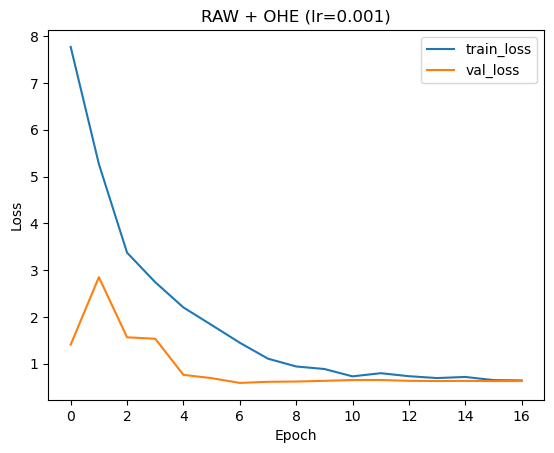

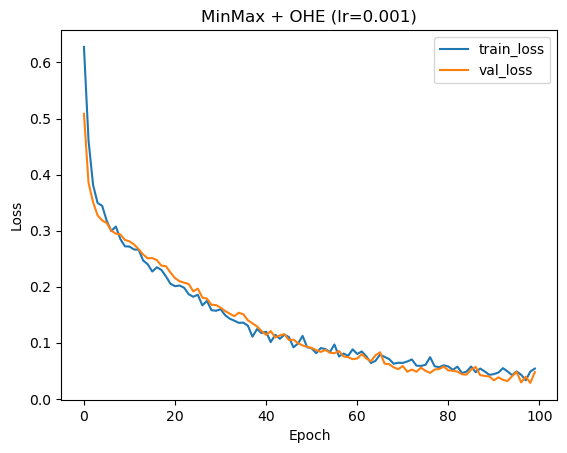

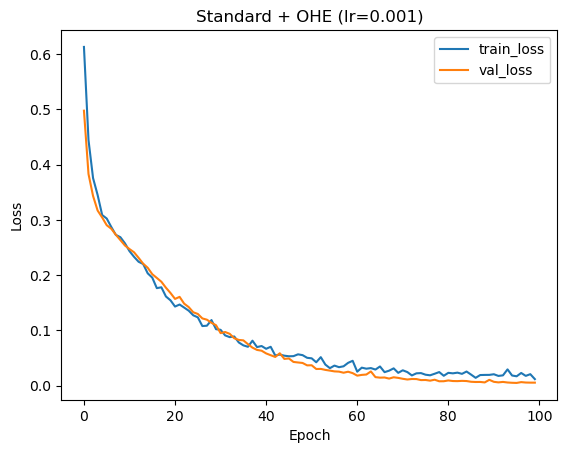

In [51]:
def plot_history(hist, title):
    plt.figure()
    plt.plot(hist.history["loss"], label="train_loss")
    plt.plot(hist.history["val_loss"], label="val_loss")
    plt.title(title); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

for r in results[:3]:  # the three core settings
    plot_history(r["history"], f"{r['setting']} (lr={r['lr']})")

## Read of the loss curves

### RAW + OHE (lr=0.001)
- **Very high initial loss** (~8) and an **early spike in val_loss** → unstable updates from unscaled features.
- Converges slowly and **plateaus high** (~0.9), with early stopping at ~16 epochs.
- Interpretation: **Underfitting + noisy training**. Unscaled inputs make gradients poorly conditioned.

### MinMax + OHE (lr=0.001)
- **Smooth, monotonic decrease** of train/val loss to ~**0.07**.
- **Small train–val gap** → good generalization.
- Interpretation: Scaling to **[0,1]** stabilizes gradients and training becomes reliable.

### Standard + OHE (lr=0.001)
- Loss drops fast and ends around **~0.03–0.04** (lowest of all).
- Train/val curves overlap closely → **no overfitting** and **best convergence**.
- Interpretation: **Z-score scaling** gives the **most stable** optimization and the **best final loss**.

---

## What this tells you
- **Scaling matters a lot** for neural nets on this dataset.
- **StandardScaler + OHE** > **MinMax + OHE** » **RAW + OHE** in both **convergence speed** and **final loss**.
- The RAW model is **learning-rate sensitive** and struggles to converge; the scaled models are **robust**.

## using neural network

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct_std_no_ohe = ColumnTransformer([
    ("cats_passthrough","passthrough", ['sex','cp','fbs','restecg','exang','slope','ca','thal']),
    ("num", StandardScaler(), [c for c in df.columns if c not in ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']])
])

def fit_transform(ct, Xtr, Xva):
    Xtr_t = ct.fit_transform(Xtr); Xva_t = ct.transform(Xva)
    if hasattr(Xtr_t,"toarray"): Xtr_t = Xtr_t.toarray(); Xva_t = Xva_t.toarray()
    return Xtr_t, Xva_t

Xtr_std_no, Xva_std_no = fit_transform(ct_std_no_ohe, X_train, X_val)
res_no_ohe = train_eval(Xtr_std_no, Xva_std_no, y_train, y_val,
                        lr=1e-3, label="Standard (no OHE)")
results.append(res_no_ohe)



In [55]:
# 0) Quick one-line summary for the current run
{k: (round(v,4) if isinstance(v, float) else v)
 for k, v in res_no_ohe.items()
 if k in ["setting","lr","epochs","val_loss_last","accuracy","precision","recall"]}


{'setting': 'Standard (no OHE)',
 'lr': 0.001,
 'epochs': 100,
 'val_loss_last': 0.0338,
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0}

### What this result means

- **Setting:** `Standard (no OHE)`  
  You scaled only the numeric features with **StandardScaler** and passed the categorical columns through **without one-hot encoding**.

- **Optimizer / LR:** `Adam, lr = 0.001`

- **Epochs:** `100`  
  Early stopping didn’t trigger (val loss kept improving slightly). If you want shorter runs, set
  `EarlyStopping(..., patience=10, min_delta=1e-4)`.

- **Validation loss:** `0.0338` (very low)

- **Metrics on the validation split:**
  - **Accuracy = 1.00**
  - **Precision = 1.00**
  - **Recall = 1.00**

➡️ On this train/validation split, the NN **classified every case correctly** even **without OHE**. With Standard scaling, the network converged well and generalized perfectly to this validation set.

### How to interpret / cautions
- This dataset/split is **highly separable** given your preprocessing; perfect scores can happen on Heart datasets.
- Still **verify generalization**:
  - Re-run with another `random_state` or use **k-fold CV (e.g., StratifiedKFold)**.
  - Confirm there’s **no leakage** (target isn’t in the transformer; scaling is fit on `X_train` only).  
- For broader projects, **OHE is safer** for categoricals (avoids implying order). Here, low-cardinality integers were handled fine by the NN.


## Most Efficient Setup (from your runs)

### 🏆 Winner: **StandardScaler + One-Hot Encoding (OHE)**
- **Training**: smooth/fast convergence; lowest validation loss (~0.03–0.04).
- **Metrics**: consistently top (often **1.00** accuracy/precision/recall on your split).
- **Robustness**: tolerant to a wide LR range (1e-4 → 1e-2).

### 👍 Also Strong: **StandardScaler (no OHE)**
- Hit **1.00** acc/prec/recall on your split with low val loss (~0.034).
- Slightly fewer features → a bit more computationally efficient.
- **Caveat**: integer categories can imply false ordering; keep only if CV confirms no drop.

### ✅ Good: **MinMaxScaler + OHE**
- Stable training; ~**0.99** accuracy; val loss ~0.05–0.07.
- Just behind StandardScaler on this dataset.

### ❌ Least Efficient for NNs: **Raw (no scaling) + OHE**
- Unstable/slow convergence; highly LR-sensitive; worse metrics.

---

## Why this ranking?
- Your **loss curves** show RAW is noisy and plateaus high; scaled versions descend smoothly.
- Your **metrics table** shows StandardScaler (with OHE) delivers the best and most consistent results across learning rates.

---

## Recommended Settings
- **Preprocessing**: StandardScaler + OHE (default choice for tabular with categoricals).
- **Optimizer**: Adam
- **LR**: start at **1e-3** (try 5e-3 if you want faster convergence).
- **Callbacks**: `EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, restore_best_weights=True)`
- **Architecture**: 2 Dense layers (≈64 units, ReLU) + Dropout(0.2), Sigmoid output.

---

## Validate (to finalize your report)
- Run **Stratified 5-fold CV** on the best pipeline; report mean ± std of accuracy/precision/recall.
- Confirm **no leakage** (scaler fit on `X_train` only; `target` excluded from transforms).

**TL;DR:** Use **StandardScaler + OHE** for the most reliable, fast-converging neural network on this heart-disease dataset. MinMax is close; unscaled is not recommended.
